In [1]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
import nglview as nv
import seaborn as sns


# # # Path: pymdna/__init__.py, prototype of the package and atomic is not properly referenced in the package at genertors.py now I just explicitly define the path loction
# # import pymdna as mdna
import sys
sys.path.append('/Users/thor/surfdrive/Projects/pymdna/')
import pymdna as mdna 
%load_ext autoreload
%autoreload 2

/Users/thor/surfdrive/Projects/PMCpy/pmcpy/Evals/PyLk/pylk/writhemap.py:16: UserWarning: Cython version of writhemap (PyLk) not compiled. Defaulting to numba implementation. Consider compiling the cython version.
  warnings.warn(
/Users/thor/surfdrive/Projects/PMCpy/pmcpy/Evals/PyLk/pylk/eval_link.py:10: UserWarning: Cython version of linkingnumber (PyLk) not compiled. Defaulting to numba implementation. Consider compiling the cython version.
  warnings.warn(


In [2]:
pdb = md.load('./1kx5_full.pdb')
view = nv.show_mdtraj(pdb)
view 


NGLWidget()

Random sequence: CATTAACAGATTGTTCCCTCGTTTACGAAATACAGC 

Minimize the DNA structure:
simple equilibration = False 
equilibrate writhe = False 
excluded volume radius = 0 
temperature = 300
Circular: False
Random sequence: GTCGGCGAACTCACGAGAGGCCCTTGTTTTCGTCAG 

Minimize the DNA structure:
simple equilibration = False 
equilibrate writhe = False 
excluded volume radius = 0 
temperature = 300
Circular: False


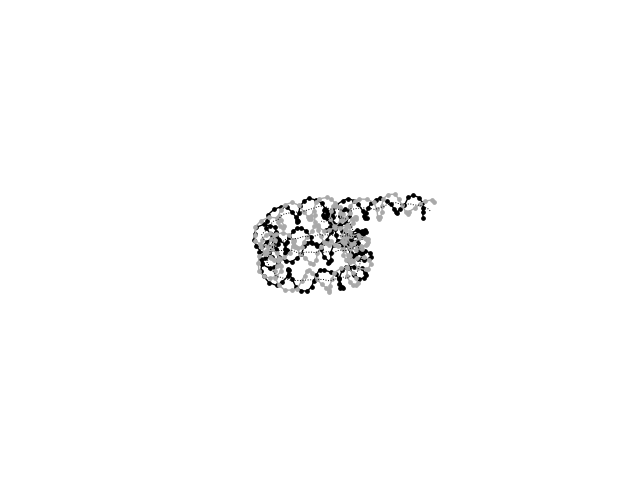

In [21]:
# Load DNA part form traj object
dna = mdna.load(pdb)
dna.describe()

# Add random linker DNA in forward and reverse direction
dna.extend(n_bp=36,exvol_rad=0)
dna.extend(n_bp=36,exvol_rad=0,forward=False)

dna.draw()

In [23]:
# Stack extended DNA and protein back together
protein = pdb.atom_slice(pdb.top.select('not chainid 0 1'))
dna_traj = dna.get_traj()
extended_traj = dna_traj.stack(protein)

# Save extended traj
extended_traj.save_pdb('1kx5_full_extended.pdb')
